In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import ineqpy
DATA_dir = "sugarscape/data/"

In [69]:
data_filenames = [f for f in listdir(DATA_dir) if isfile(join(DATA_dir, f))]
print(data_filenames)

['2021-01-25 16.16 Agent Vars.csv', '2021-01-25 16.39 Agent Vars.csv', '2021-01-25 16.47 Agent Vars.csv', '2021-01-25 17.02 Agent Vars.csv', '2021-01-25 17.08 Agent Vars.csv']


In [70]:
df_concat_list = []
run = 0
for data_filename in data_filenames:
    df = pd.read_csv(DATA_dir + data_filename)
    df.insert(0, "Run", run)
    run += 1
    
    for step in set(df["Step"].tolist()):
        wealth = np.array( df.loc[(df.Step == step)]["Wealth"].tolist() )
        gini = ineqpy.gini(np.array(wealth))
        df.loc[(df.Step == step), "Gini"] = gini
        
    df_concat_list.append(df)

data_raw = pd.concat(df_concat_list)
del df_concat_list
del run
data_raw

,Run,Step,AgentID,Wealth,Position,Vision,N_Agents,Size,inheritance taxbrackets,inheritance tax percentages,Starting Wealth,Gini
0,0,0,0,5.0,"(43, 38)",5,250,50,[],[],5,9.900363e-33
1,0,0,1,5.0,"(11, 40)",5,250,50,[],[],5,9.900363e-33
2,0,0,2,5.0,"(22, 17)",5,250,50,[],[],5,9.900363e-33
3,0,0,3,5.0,"(32, 26)",5,250,50,[],[],5,9.900363e-33
4,0,0,4,5.0,"(32, 41)",5,250,50,[],[],5,9.900363e-33
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4,999,88-18,11.0,"(39, 16)",5,250,50,[],[],5,4.319092e-01
249996,4,999,156-16,6.0,"(3, 40)",5,250,50,[],[],5,4.319092e-01
249997,4,999,227-16,6.0,"(19, 48)",5,250,50,[],[],5,4.319092e-01
249998,4,999,82-17,4.0,"(29, 13)",5,250,50,[],[],5,4.319092e-01


In [71]:
data = data_raw.groupby(["Run", "Step"]).mean().reset_index()
data = data[["Run", "Step", "Gini"]]
data

,Run,Step,Gini
0,0,0,9.900363e-33
1,0,1,4.483180e-01
2,0,2,4.310404e-01
3,0,3,4.463359e-01
4,0,4,4.533996e-01
...,...,...,...
4995,4,995,4.361830e-01
4996,4,996,4.343252e-01
4997,4,997,4.412638e-01
4998,4,998,4.379383e-01


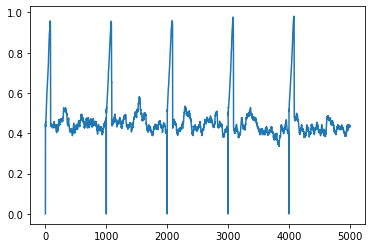

In [72]:
plt.plot(data["Gini"].tolist())
plt.show()